In [1]:
# Cell 1: Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import os
import sys
import importlib

# Add 'src' to path to import our modules
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Import and reload our preprocessor to get stopwords
try:
    from src import preprocessor
    importlib.reload(preprocessor)
    print("Successfully imported and reloaded preprocessor module.")
except ImportError as e:
    print(f"Error importing preprocessor: {e}")

# Set up NLTK (for stopwords in word cloud)
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
print("Libraries and modules loaded.")

Successfully imported and reloaded preprocessor module.
Libraries and modules loaded.


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Zeel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Cell 2: Load and Merge All Data Sources
# We need data from three different files to build all our plots:
# 1. labeled-posts.csv (for sentiment labels)
# 2. cleaned-posts.csv (for tokenized text for word clouds)
# 3. reddit-posts.json (for timestamps for trend analysis)

LABELED_DATA_PATH = '../data/processed/labeled-posts.csv'
CLEANED_DATA_PATH = '../data/processed/cleaned-posts.csv'
RAW_DATA_PATH = '../data/raw/reddit-posts.json'
OUTPUT_DIR = '../outputs'

# Create outputs directory if it doesn't exist
os.makedirs(OUTPUT_DIR, exist_ok=True)

try:
    # Load all three data sources
    labeled_df = pd.read_csv(LABELED_DATA_PATH)
    cleaned_df = pd.read_csv(CLEANED_DATA_PATH)
    raw_df = pd.read_json(RAW_DATA_PATH)
    
    # Merge them into one master DataFrame
    # 1. Merge labeled (sentiment) and cleaned (tokens)
    df = pd.merge(
        labeled_df[['id', 'vader_sentiment']], 
        cleaned_df[['id', 'tokens_joined']], 
        on='id'
    )
    
    # 2. Merge with raw (timestamps)
    df = pd.merge(
        df,
        raw_df[['id', 'created_date']],
        on='id'
    )
    
    # Convert created_date to datetime objects for plotting
    df['created_date'] = pd.to_datetime(df['created_date'])
    
    print(f"Successfully loaded and merged data. Total records: {len(df)}")
    print(df.info())
    print(df.head())

except Exception as e:
    print(f"Error loading and merging data: {e}")

Successfully loaded and merged data. Total records: 1177
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               1177 non-null   object        
 1   vader_sentiment  1177 non-null   object        
 2   tokens_joined    979 non-null    object        
 3   created_date     1177 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 36.9+ KB
None
        id vader_sentiment                                      tokens_joined  \
0  1nq5b7a        positive  think ai influencers working super early youre...   
1  1j0mjze        positive  ai influencers aigenerated personalities exist...   
2  1gc7syt        positive  game called paradise scamming people using peo...   
3  1dzjxq8        positive  white text means controversial pink text means...   
4  16nljql        positive  intrigued world virtu

Generating Plot 1: Sentiment Distribution (Pie Chart)...
Pie chart saved to ../outputs\sentiment_distribution.png


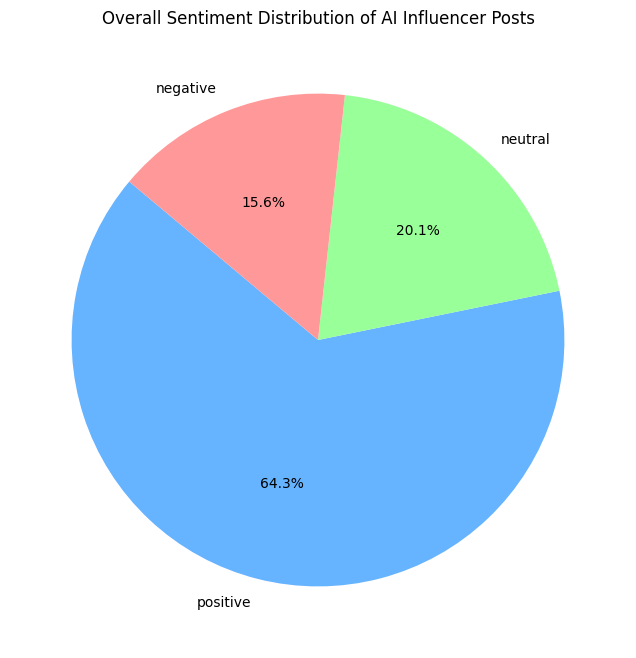

In [3]:
# Cell 3: Plot 1 - Sentiment Distribution (Pie Chart)
if 'df' in locals():
    print("Generating Plot 1: Sentiment Distribution (Pie Chart)...")
    
    # Get sentiment counts
    sentiment_counts = df['vader_sentiment'].value_counts()
    
    plt.figure(figsize=(8, 8))
    plt.pie(
        sentiment_counts, 
        labels=sentiment_counts.index, 
        autopct='%1.1f%%', 
        startangle=140,
        colors=['#66b3ff', '#99ff99', '#ff9999'] # Blue, Green, Red
    )
    plt.title('Overall Sentiment Distribution of AI Influencer Posts')
    
    # Save PNG
    pie_chart_path = os.path.join(OUTPUT_DIR, 'sentiment_distribution.png')
    plt.savefig(pie_chart_path)
    print(f"Pie chart saved to {pie_chart_path}")
    
    plt.show()

Generating Plot 2: Positive and Negative Word Clouds...
Positive word cloud saved to ../outputs\wordcloud_positive.png


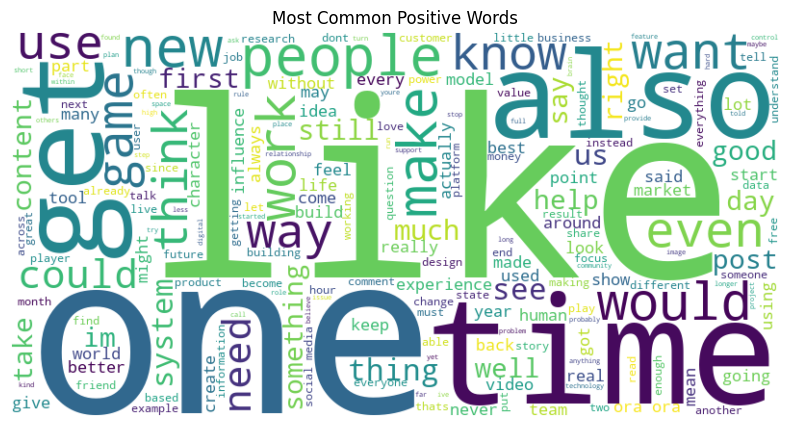

Negative word cloud saved to ../outputs\wordcloud_negative.png


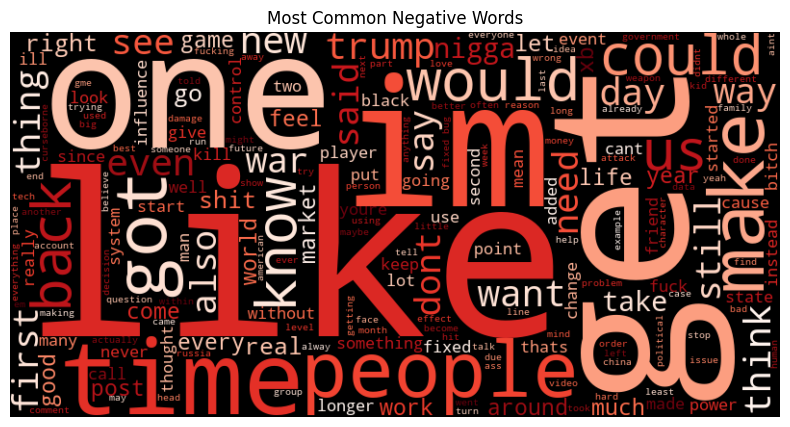

In [4]:
# Cell 4: Plot 2 - Word Clouds (Positive vs. Negative)
# (As specified in your roadmap: wordcloud-pos.png)
if 'df' in locals():
    print("Generating Plot 2: Positive and Negative Word Clouds...")
    
    # Add any custom stopwords if needed (e.g., the influencers' names)
    custom_stopwords = stop_words.union({'lilmiquela', 'imma', 'gram', 'ai', 'influencer'})
    
    # --- Positive Word Cloud ---
    pos_text = ' '.join(df[df['vader_sentiment'] == 'positive']['tokens_joined'].dropna())
    
    if pos_text:
        pos_wordcloud = WordCloud(
            width=800, 
            height=400, 
            background_color='white', 
            stopwords=custom_stopwords
        ).generate(pos_text)
        
        plt.figure(figsize=(10, 5))
        plt.imshow(pos_wordcloud, interpolation='bilinear')
        plt.title('Most Common Positive Words')
        plt.axis('off')
        
        # Save PNG
        pos_wc_path = os.path.join(OUTPUT_DIR, 'wordcloud_positive.png')
        plt.savefig(pos_wc_path)
        print(f"Positive word cloud saved to {pos_wc_path}")
        plt.show()
    else:
        print("No positive text found to generate a word cloud.")

    # --- Negative Word Cloud ---
    neg_text = ' '.join(df[df['vader_sentiment'] == 'negative']['tokens_joined'].dropna())
    
    if neg_text:
        neg_wordcloud = WordCloud(
            width=800, 
            height=400, 
            background_color='black', # Often good to contrast
            colormap='Reds',
            stopwords=custom_stopwords
        ).generate(neg_text)
        
        plt.figure(figsize=(10, 5))
        plt.imshow(neg_wordcloud, interpolation='bilinear')
        plt.title('Most Common Negative Words')
        plt.axis('off')
        
        # Save PNG
        neg_wc_path = os.path.join(OUTPUT_DIR, 'wordcloud_negative.png')
        plt.savefig(neg_wc_path)
        print(f"Negative word cloud saved to {neg_wc_path}")
        plt.show()
    else:
        print("No negative text found to generate a word cloud.")

Generating Plot 3: Sentiment Trends Over Time (Line Chart)...
Trends chart saved to ../outputs\sentiment_trends.png


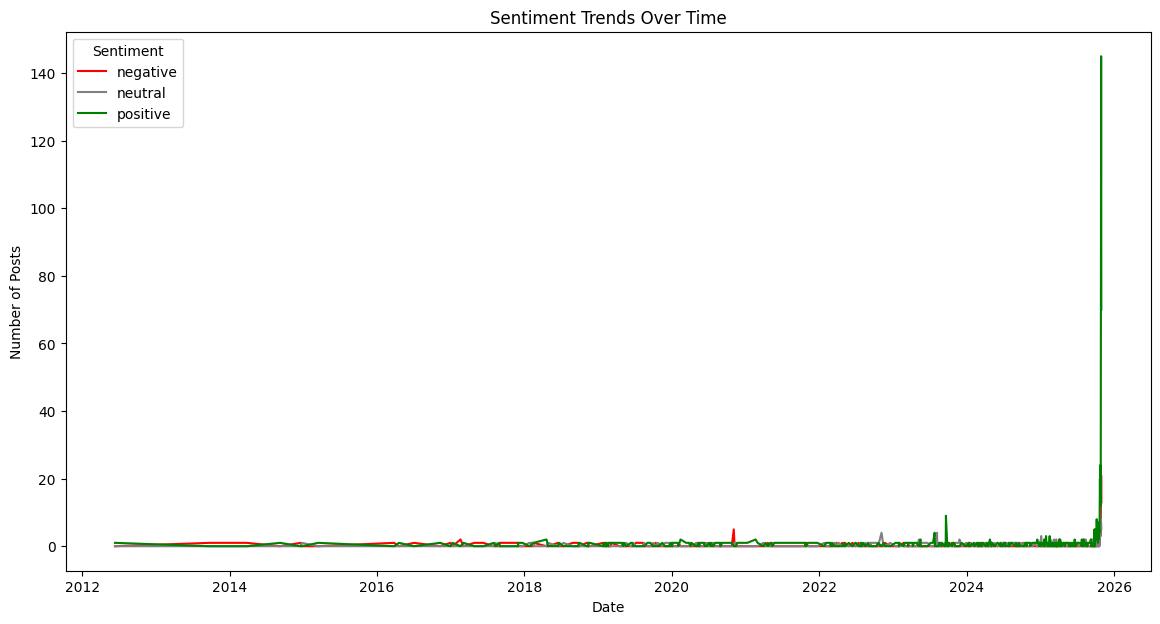

In [5]:
# Cell 5: Plot 3 - Sentiment Trends Over Time (Line Chart)
# (As specified in your roadmap: Group by data for trends)
if 'df' in locals():
    print("Generating Plot 3: Sentiment Trends Over Time (Line Chart)...")
    
    # Set the date as the index
    df_trends = df.set_index('created_date')
    
    # Resample the data by day (or 'W' for week, 'M' for month)
    # and count the occurrences of each sentiment
    daily_sentiment = df_trends.resample('D')['vader_sentiment'].value_counts().unstack().fillna(0)
    
    if not daily_sentiment.empty:
        plt.figure(figsize=(14, 7))
        sns.lineplot(data=daily_sentiment, dashes=False, palette={'positive':'green', 'negative':'red', 'neutral':'grey'})
        
        plt.title('Sentiment Trends Over Time')
        plt.xlabel('Date')
        plt.ylabel('Number of Posts')
        plt.legend(title='Sentiment')
        
        # Save PNG
        trends_path = os.path.join(OUTPUT_DIR, 'sentiment_trends.png')
        plt.savefig(trends_path)
        print(f"Trends chart saved to {trends_path}")
        
        plt.show()
    else:
        print("Could not generate trend data. Check if 'created_date' was loaded correctly.")